In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_absolute_error
mpl.rc('font',family='malgun gothic')

In [3]:
df = pd.read_excel('06.dataset.xlsx')

# 낙찰이 불확실한 경우 낙찰가 예측

### 1) 전지역 통합 분석

In [74]:
data = pd.concat([
        df.ix[:, 'lot_of_land':'현상변경허가 대상구역'],
        df.ix[:, '도시지역_주거지역':'자연환경보전지역'],
        df.ix[:, 'log_est_jiga'],
        df.ix[:, 'log_area'],
    ], axis = 1)
target = df.ix[:, 'log_bid_jiga']

In [105]:
data = sm.add_constant(data)
model = sm.OLS(target, data)
result = model.fit()
print(result.summary())
print(mean_absolute_error(result.predict(), target))
print(mean_absolute_error(np.exp(result.predict()) * df['area(m2)'], np.exp(target) * df['area(m2)']))

                            OLS Regression Results                            
Dep. Variable:           log_bid_jiga   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     870.2
Date:                Mon, 11 Apr 2016   Prob (F-statistic):               0.00
Time:                        04:17:30   Log-Likelihood:                -6496.1
No. Observations:                9961   AIC:                         1.323e+04
Df Residuals:                    9841   BIC:                         1.410e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.6964      0.087     

In [115]:
data2 = data.drop(result.pvalues[result.pvalues > 0.01].index, axis = 1)
model2 = sm.OLS(target, data2)
result2 = model2.fit()
print(result2.summary())
print(mean_absolute_error(result2.predict(), target))
print(mean_absolute_error(np.exp(result2.predict()) * df['area(m2)'], np.exp(target) * df['area(m2)']))

                            OLS Regression Results                            
Dep. Variable:           log_bid_jiga   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     2047.
Date:                Mon, 11 Apr 2016   Prob (F-statistic):               0.00
Time:                        04:24:20   Log-Likelihood:                -6581.5
No. Observations:                9961   AIC:                         1.326e+04
Df Residuals:                    9910   BIC:                         1.363e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.6724      0.078      8.638

In [125]:
scores = -cross_val_score(LinearRegression(),
                          data,
                          target,
                          "mean_absolute_error", cv=10)
scores

array([ 0.39034896,  0.3974446 ,  0.41637388,  0.38815559,  0.41279227,
        0.25161281,  0.25335469,  0.31731345,  0.3048524 ,  0.53234771])

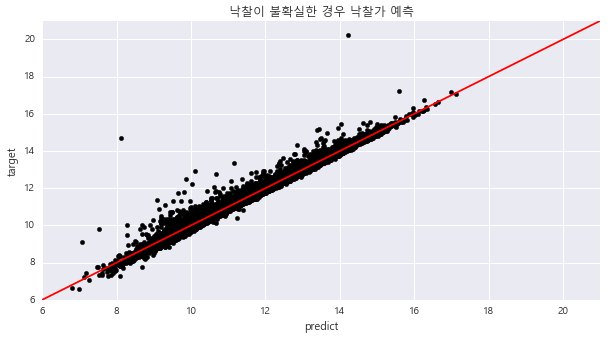

In [138]:
x = range(1, 30)
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(result.predict(), target, c = 'k')
plt.plot(x, x, c = 'r')
ax.set_ylabel('target')
ax.set_xlabel('predict')
plt.axis([6, 21, 6, 21])
ax.set_title('낙찰이 불확실한 경우 예측가')
plt.show()

# 낙찰이 확정된 경우 낙찰가 예측

In [131]:
data = pd.concat([
        df.ix[:, 'lot_of_land':'현상변경허가 대상구역'],
        df.ix[:, '도시지역_주거지역':'자연환경보전지역'],
        df.ix[:, 'log_est_jiga'],
        df.ix[:, 'log_area'],
        df.ix[:, 'log_min_jiga']
    ], axis = 1)
target = df.ix[:, 'log_bid_jiga']

In [132]:
data = sm.add_constant(data)
model = sm.OLS(target, data)
result = model.fit()
print(result.summary())
print(mean_absolute_error(result.predict(), target))
print(mean_absolute_error(np.exp(result.predict()) * df['area(m2)'], np.exp(target) * df['area(m2)']))

                            OLS Regression Results                            
Dep. Variable:           log_bid_jiga   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3576.
Date:                Mon, 11 Apr 2016   Prob (F-statistic):               0.00
Time:                        04:29:19   Log-Likelihood:                 246.15
No. Observations:                9961   AIC:                            -250.3
Df Residuals:                    9840   BIC:                             621.7
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.4911      0.044     

In [133]:
data2 = data.drop(result.pvalues[result.pvalues > 0.01].index, axis = 1)
model2 = sm.OLS(target, data2)
result2 = model2.fit()
print(result2.summary())
print(mean_absolute_error(result2.predict(), target))
print(mean_absolute_error(np.exp(result2.predict()) * df['area(m2)'], np.exp(target) * df['area(m2)']))

                            OLS Regression Results                            
Dep. Variable:           log_bid_jiga   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.049e+04
Date:                Mon, 11 Apr 2016   Prob (F-statistic):               0.00
Time:                        04:30:03   Log-Likelihood:                 168.39
No. Observations:                9961   AIC:                            -306.8
Df Residuals:                    9946   BIC:                            -198.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.3991      0.028     14.039   

In [134]:
scores = -cross_val_score(LinearRegression(),
                          data,
                          target,
                          "mean_absolute_error", cv=10)
scores

array([ 0.20401188,  0.18395749,  0.18497299,  0.15765336,  0.15874957,
        0.12218587,  0.11566167,  0.1222053 ,  0.12145511,  0.1172004 ])

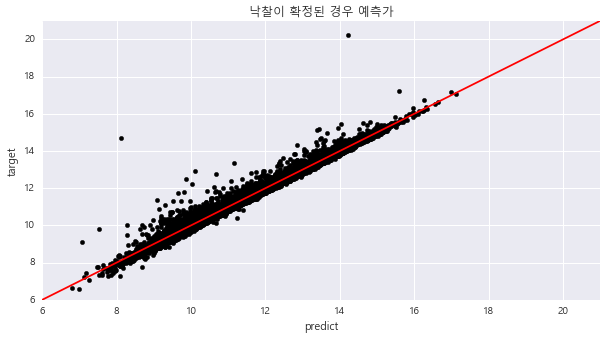

In [137]:
x = range(1, 30)
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(result.predict(), target, c = 'k')
plt.plot(x, x, c = 'r')
ax.set_ylabel('target')
ax.set_xlabel('predict')
ax.set_title('낙찰이 확정된 경우 예측가')
plt.axis([6, 21, 6, 21])
plt.show()